In [1]:
import sys
from rmc_tools import rmc6f_stuff
import copy

In [2]:
rmc6f_file_name = "ceramic.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.292 s
------------------------------------------


In [3]:
li_ta_coord_c = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_c.append(ta_num)

In [4]:
rmc6f_file_name = "glass_ceramic.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.312 s
------------------------------------------


In [5]:
li_ta_coord_gc = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_gc.append(ta_num)

In [6]:
rmc6f_file_name = "glass.rmc6f"
lita_ul = 5.0
input_rmc_config = rmc6f_stuff.RMC6FReader(rmc6f_file_name)


Reading in the RMC6F configuration...
Progress: 
....5%....10%....15%....20%
....25%....30%....35%....40%
....45%....50%....55%....60%
....65%....70%....75%....80%
....85%....90%....95%....100%

------------------------------------------
RMC6F configuration successfully read in.
Time taken:      0.231 s
------------------------------------------


In [7]:
li_ta_coord_g = list()
for i in range(input_rmc_config.numAtoms):
    if input_rmc_config.atomsEle[i] == "Li":
        atom_coord_1 = input_rmc_config.atomsCoordInt[i]
        ta_num = 0
        for j in range(input_rmc_config.numAtoms):
            cond1 = input_rmc_config.atomsEle[j] == "Ta"
            if cond1:
                atom_coord_2 = input_rmc_config.atomsCoordInt[j]
                dist_temp = rmc6f_stuff.dist_calc_coord(
                    atom_coord_1, atom_coord_2,
                    input_rmc_config.vectors
                )
                if dist_temp <= lita_ul and dist_temp > 1.E-5:
                    ta_num += 1
        li_ta_coord_g.append(ta_num)

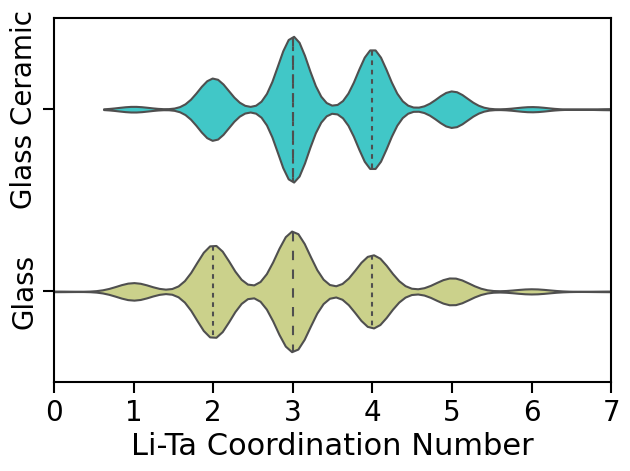

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
data1 = li_ta_coord_c
data2 = li_ta_coord_gc
data3 = li_ta_coord_g

# Combine data into a DataFrame
import pandas as pd

# df = pd.DataFrame({'Ceramic': data1, 'Glass Ceramic': data2, 'Glass': data3})
df = pd.DataFrame({'Glass Ceramic': data2, 'Glass': data3})

import matplotlib.font_manager as fm

# Get the Arial font path
font_path = fm.findfont(fm.FontProperties(family='Arial'))

# Set the font properties for the plot
font_prop = fm.FontProperties(fname=font_path)

# Create horizontal violin plot
ax = sns.violinplot(data=df, palette="rainbow", orient="h", inner="quart")
plt.xlabel('Li-Ta Coordination Number', fontsize=22, fontproperties=font_prop)
plt.xticks(fontsize=20, fontproperties=font_prop)
plt.yticks(fontsize=20, rotation=90, va="center", fontproperties=font_prop)
plt.tick_params(axis='both', which='both', length=8, width=1.5)
plt.tick_params(axis='y', which='both', length=8)
plt.xlim(0, 7)
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.5

plt.tight_layout()
plt.show()

In [17]:
ax.get_figure().savefig("li_ta_coord.png", dpi=300)